In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime
import asyncio
from wordcloud import WordCloud, STOPWORDS

from bs4 import BeautifulSoup
import requests

# import os
# for dirname, _, filenames in os.walk('..\Spotify_dataset'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
# Dataset: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [2]:
# Config
pd.options.display.max_rows = 10
pd.set_option("min_rows", 20)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns',None)

path = '../Spotify_dataset'
# print(os.listdir(path))

songs = pd.read_csv(path+'/songs_normalize.csv')
songs["duration_s"] = songs.duration_ms.apply(lambda x : round(x/1000))
songs.drop("duration_ms", axis=1, inplace=True)
print(songs)

               artist                                    song  explicit  year  \
0      Britney Spears                  Oops!...I Did It Again     False  2000   
1           blink-182                    All The Small Things     False  1999   
2          Faith Hill                                 Breathe     False  1999   
3            Bon Jovi                            It's My Life     False  2000   
4              *NSYNC                             Bye Bye Bye     False  2000   
5               Sisqo                              Thong Song      True  1999   
6              Eminem                     The Real Slim Shady      True  2000   
7     Robbie Williams                                 Rock DJ     False  2000   
8     Destiny's Child                             Say My Name     False  1999   
9               Modjo                  Lady - Hear Me Tonight     False  2001   
...               ...                                     ...       ...   ...   
1990        Sam Smith       

In [4]:
# Standard Pitch Class notation, e.g. 0 = C, 1 = C♯/D♭, 2 = D, etc. If no key was detected, the value is -1.
print('Common keys: \n', songs['key'].value_counts().sort_values(ascending=False))

# Successful artists.
artists = songs['artist'].value_counts()
print('Common artists: \n', artists.sort_values(ascending=False))

# Some artist's popularity over the years

# Group sth with some features and sort with valence
# def group_by_features(group, features):
#     # unpack categories
#     return songs[group, features].groupby(group).mean().sort_values(by='valence', ascending=False)[:10]

# print(group_by_features('genre', ('valence', 'key')))

Common keys: 
 1     267
11    199
0     198
7     197
5     182
8     173
2     158
9     157
6     154
10    129
4     126
3      60
Name: key, dtype: int64
Common artists: 
 Rihanna             25
Drake               23
Eminem              21
Calvin Harris       20
Britney Spears      19
David Guetta        18
Chris Brown         17
Kanye West          17
Beyoncé             16
Taylor Swift        16
                    ..
Bon Jovi             1
Flipp Dinero         1
Dave                 1
Young T & Bugsey     1
Stormzy              1
Tones And I          1
Pedro Capó           1
Lil Tecca            1
Lunay                1
Blanco Brown         1
Name: artist, Length: 835, dtype: int64


In [6]:
songs.info()
songs.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   explicit          2000 non-null   bool   
 3   year              2000 non-null   int64  
 4   popularity        2000 non-null   int64  
 5   danceability      2000 non-null   float64
 6   energy            2000 non-null   float64
 7   key               2000 non-null   int64  
 8   loudness          2000 non-null   float64
 9   mode              2000 non-null   int64  
 10  speechiness       2000 non-null   float64
 11  acousticness      2000 non-null   float64
 12  instrumentalness  2000 non-null   float64
 13  liveness          2000 non-null   float64
 14  valence           2000 non-null   float64
 15  tempo             2000 non-null   float64
 16  genre             2000 non-null   object 


,count,mean,std,min,25%,50%,75%,max
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667437,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512435,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976
instrumentalness,2000.0,0.015226,0.087771,0.000000,0.00000,0.00000,0.000068,0.985


Tracks with explicit content: 
                    artist                                               song  \
5                   Sisqo                                         Thong Song   
6                  Eminem                                The Real Slim Shady   
19                Dr. Dre                                   The Next Episode   
23                 M.O.P.                                        Cold as Ice   
27                Da Brat                       What'chu Like (feat. Tyrese)   
30                    DMX                                           Party Up   
37                  JAY-Z                                        Big Pimpin'   
43                Dr. Dre                                   Forgot About Dre   
44          Missy Elliott                                           Hot Boyz   
53                  Sisqo                                         Incomplete   
...                   ...                                                ...   
1971    

<AxesSubplot:title={'center':'Liveness changes over year'}, xlabel='year'>

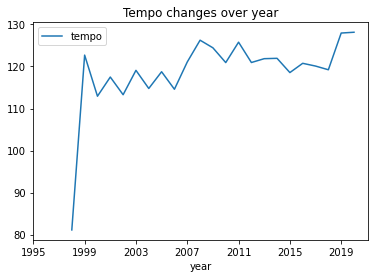

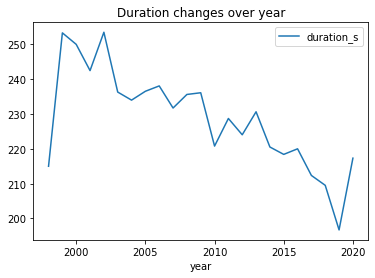

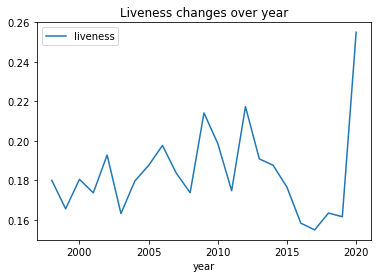

In [7]:
explicit = songs[(songs['explicit'] == True)]
print('Tracks with explicit content: \n', explicit)

def get_average_x_by_y(x, y, sort):
    print('Average', str(x), 'by', str(y)+'s:',)
    if (sort==True):
        return (songs.groupby([y]).agg({str(x):'mean'})).sort_values(x)
    return (songs.groupby([y]).agg({str(x):'mean'}))

print(get_average_x_by_y('tempo', 'genre', True))
print(get_average_x_by_y('tempo', 'artist', True))

tempo_by_years = get_average_x_by_y('tempo', 'year', False)
tempo_by_years.plot(title="Tempo changes over year", xticks=range(1995, 2020, 4))

duration_by_years = get_average_x_by_y('duration_s', 'year', False)
duration_by_years.plot(title="Duration changes over year")

liveness_by_years = get_average_x_by_y('liveness', 'year', False)
liveness_by_years.plot(title="Liveness changes over year")

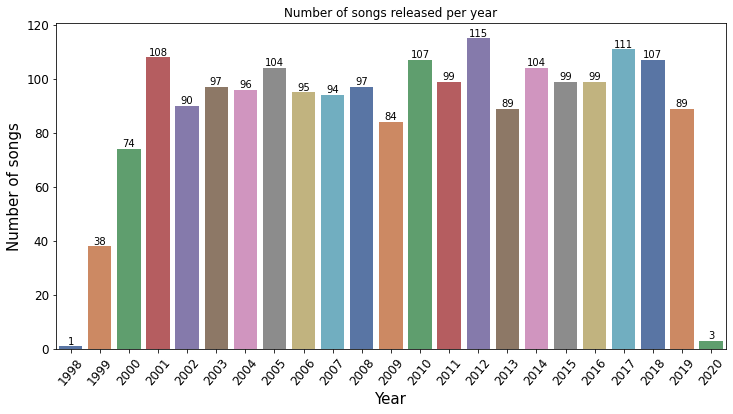

In [8]:
# Number of songs over years
songs_per_year = (songs.year.value_counts().rename_axis('year').reset_index(name = 'songs'))

plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 50)
ax.bar_label(ax.containers[0],size = 10)

plt.show()

# Bar chart of keys

# Pie Chart: explicit, mode


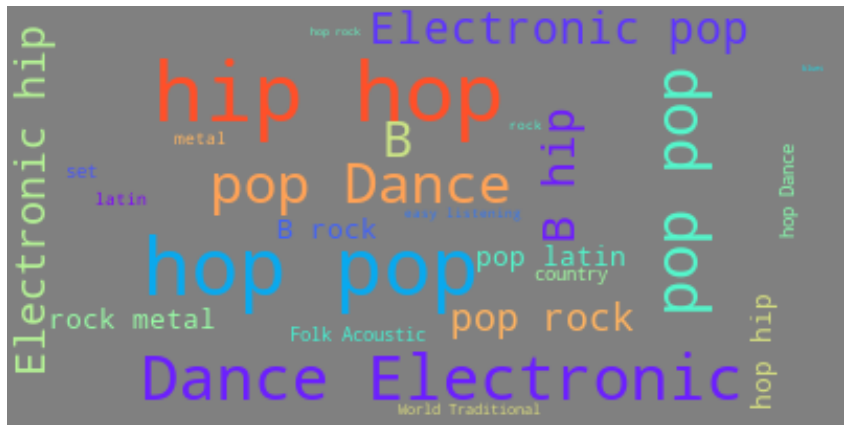

In [11]:
# # Explore data about pop with scatterplot
# pop = []

# for i in range (0,2000):
#     if songs.iloc[i]["genre"] == "pop":
#         pop.append(songs.iloc[i]["artist"])

# pop = np.array(pop)
# pop.shape
# sns.scatterplot(x="popularity", y="duration_s", data=songs)

# Wordcloud of genres (https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5)
from matplotlib import rcParams
genre_list = songs['genre'].to_list()

# https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/
genres = ' '.join(map(str,genre_list))

rcParams['figure.figsize'] = (15,8)
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, 
                      background_color='gray', colormap='rainbow',
                     max_words=200, max_font_size=40).generate(genres)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# Image wordcloud
# from PIL import Image
# mask = np.array(Image.open(""))

<AxesSubplot:>

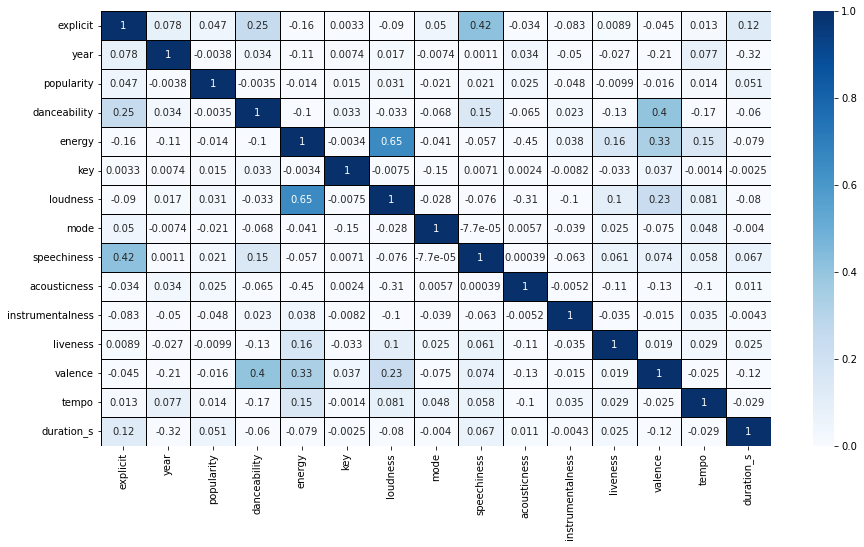

In [12]:
# Correlation between features demonstrated in heatmap
features = songs.drop(["artist", "song"], axis=1)
corr = features.corr()
sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", cbar=True, linewidths=1, linecolor='black',annot=True) # annot=True

# help(sns.heatmap)
# vlag, YlGnBu, coolwarm

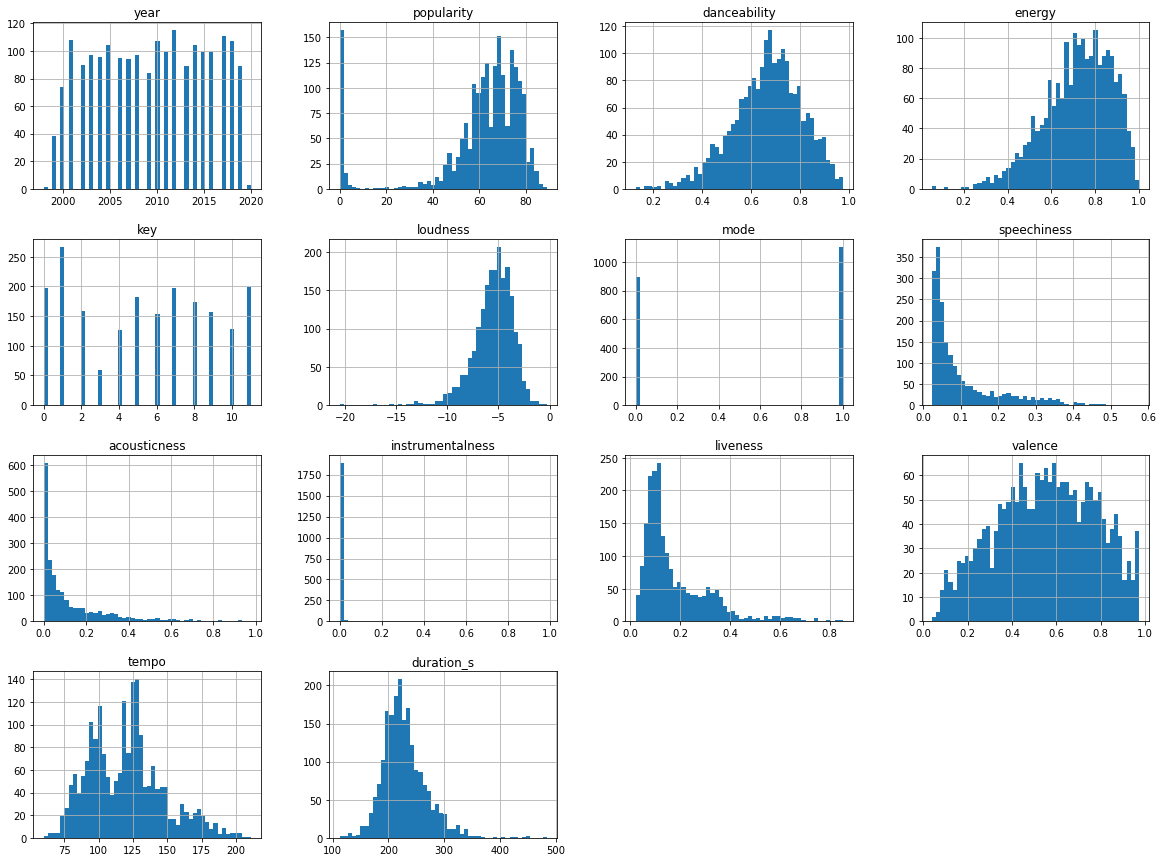

In [13]:
# Histogram for quantifiable features

# fig, axes = plt.subplots(len(songs.columns), 1)
# plt.figure(figsize=(12,12))
# # https://stackoverflow.com/questions/57602524/print-multiple-separate-histograms-in-one-loop
# for column in songs.columns:
#     i = songs.columns.get_loc(column)
#     a = np.array(songs.iloc[:, i])
#     if(songs[column].dtypes == np.int64 or songs[column].dtypes == np.float64):
#         print('Histogram for', column)
#         axes[i].hist(a) 

songs.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 0, 'Average popularity')

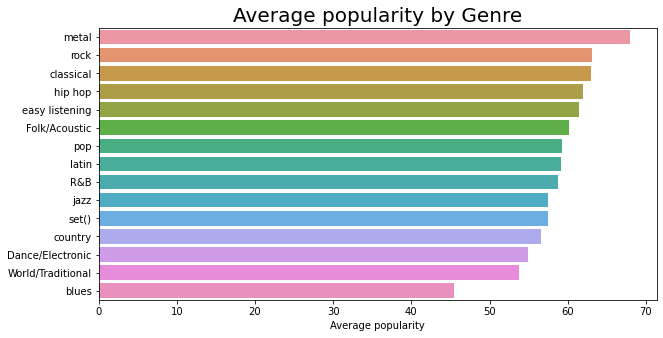

In [14]:
# Explode the genre column
songs.genre = songs.genre.apply(lambda x: x.split(", "))
df_genre_exp = songs.explode("genre")

# Craft "genres" DataFrame
genre_cols = df_genre_exp.columns.values[4:-1] #From popularity to duration_s
genre_cols = np.append(genre_cols, ["explicit"])
genres = df_genre_exp.groupby("genre")[genre_cols].mean().reset_index()
#See results
genres.head()

# Popularity by genres
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x="popularity", y="genre",
                  data=genres.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

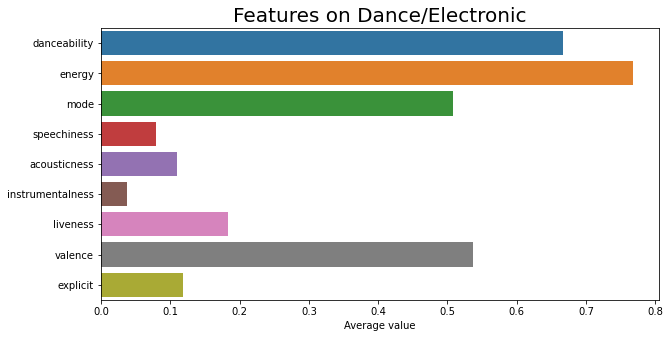

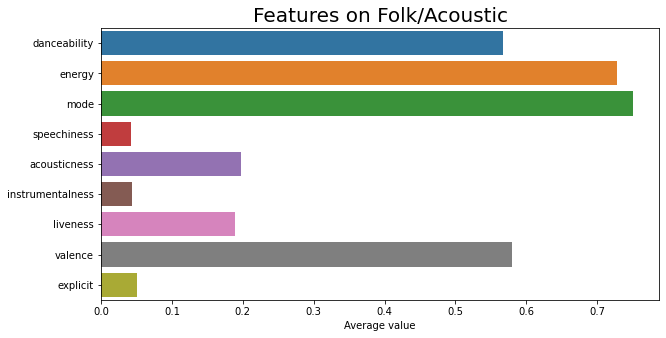

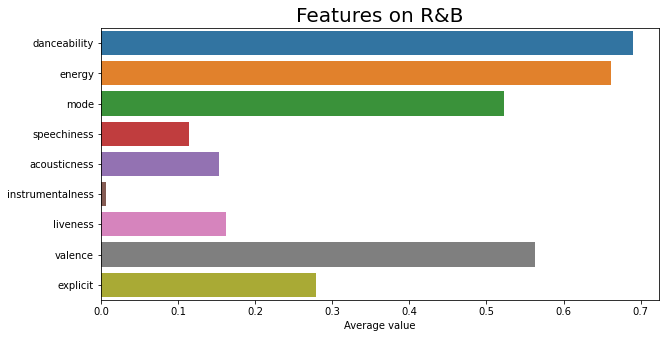

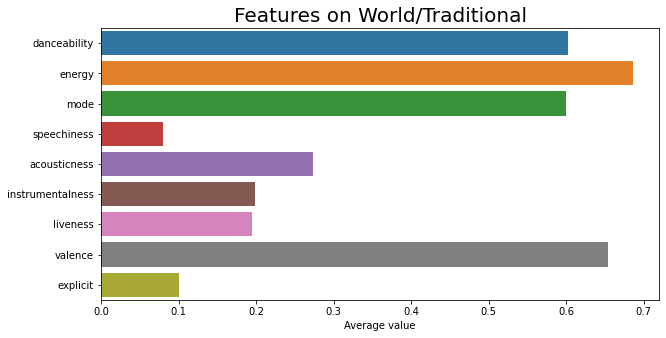

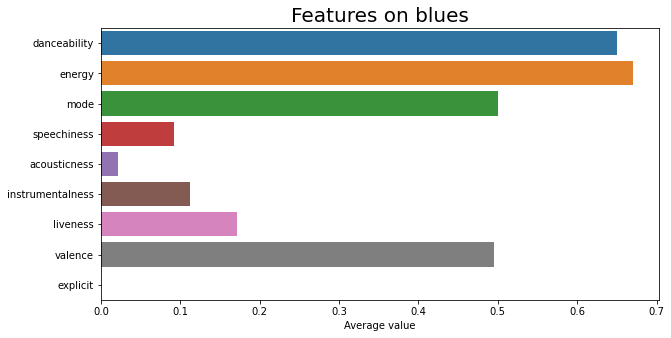

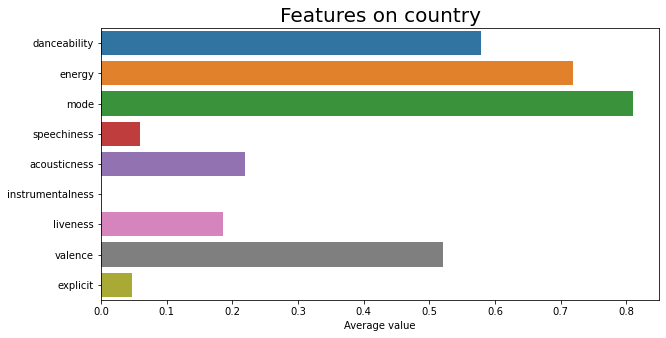

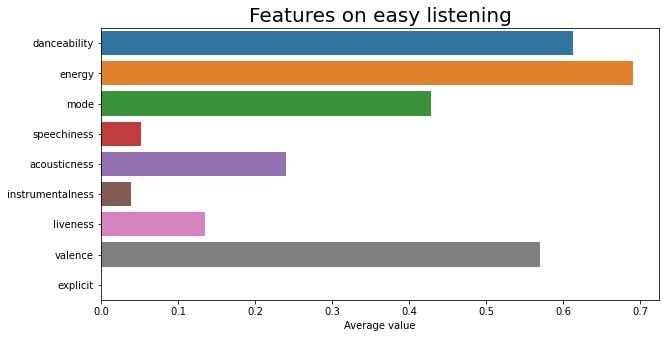

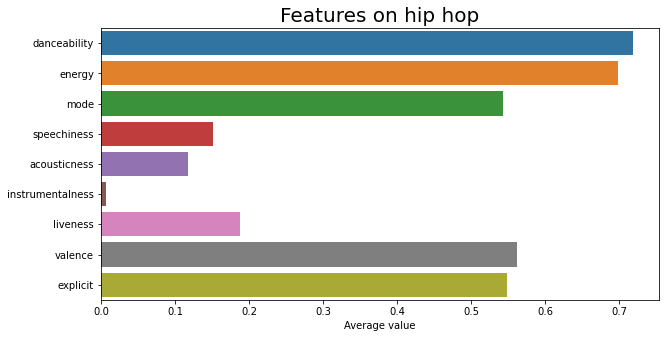

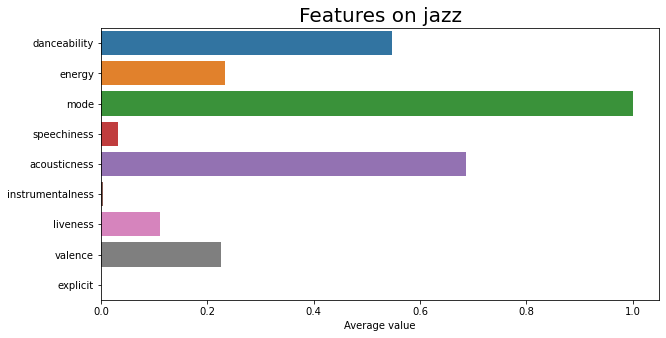

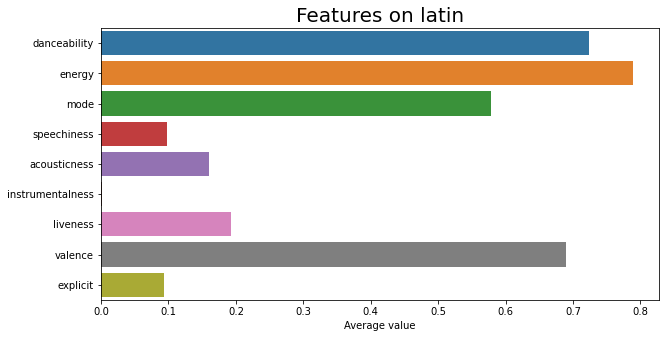

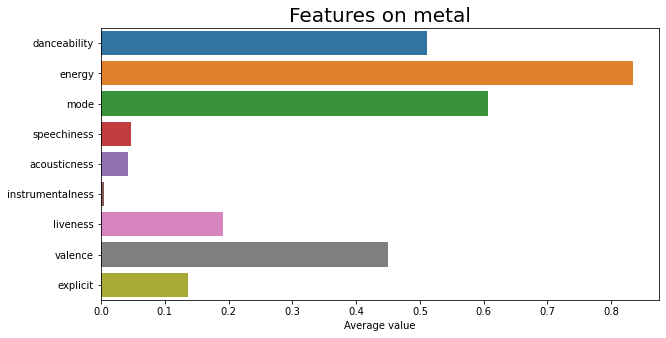

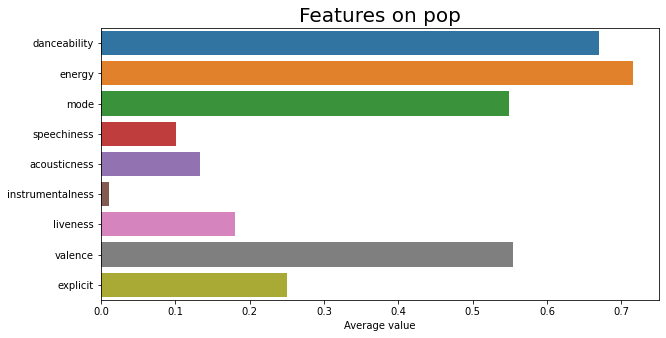

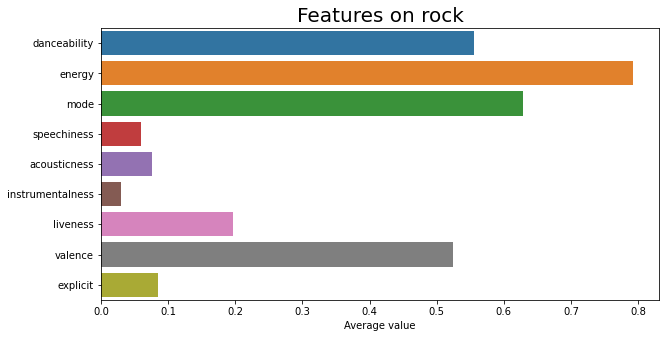

In [15]:
#Average features by genre
#Exclude "classical" and "set()"
genre_num_songs = df_genre_exp.groupby("genre").size().reset_index()
genre_num_songs.columns = ["genre", "songs"]
genre_num_songs.drop(genre_num_songs[genre_num_songs.genre.isin(["classical", "set()"])].index.values, inplace=True)
valid_genres = genre_num_songs.genre.values

for genre in valid_genres:
    data = genres.drop(["popularity"], axis=1)[genres.genre == genre]
    #Exclude features with different scales
    data = data.drop(["genre", "tempo",
                      "key", "loudness"], axis=1).transpose().reset_index()
    data.columns = ["feature", "value"]
    
    # Consider features on each genre
    plt.clf()
    ax = sns.barplot(x="value", y="feature", data=data)
    ax.set_xlabel("Average value")
    ax.set_ylabel("")
    ax.set_title("Features on " + genre, fontsize=20)
    
    plt.show()

In [16]:
def scrape_lyrics(artistname, songname):
#     artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
#     songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    page = requests.get('https://genius.com/'+ str(artistname) + '-' + str(songname) + '-' + 'lyrics')
    html = BeautifulSoup(page.text, 'html.parser')
#     lyrics1 = html.find("div", class_="lyrics")
    lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-6 YYrds")
#     if lyrics1:
#         lyrics = lyrics1.get_text()
#     elif lyrics2:
#         lyrics = lyrics2.get_text()
#     elif lyrics1 == lyrics2 == None:
#         lyrics = None
    if lyrics2:
        lyrics = lyrics2.text
    elif lyrics2 == None:
        lyrics = None
        
    return lyrics

# artist_name: string
def lyrics_onto_frame(artist_name):
    for i,x in enumerate(songs['song'].to_list()):
        lyrics_str = scrape_lyrics(artist_name, x)
        songs.loc[i, 'lyrics'] = lyrics_str
    return songs

lyrics_onto_frame('Rihanna')

# for i,x in enumerate(songs['song'].to_list()):
#     print('index', i, 'song:', x)

# help(enumerate)
# print(songs['song'].to_list())

# songs.loc[1, 'lyrics'] = 'hello world'

# print(songs)

KeyboardInterrupt: 

In [21]:
# Test
URL = requests.get('https://genius.com/'+ 'Rihanna' + '-' + 'Diamonds' + '-' + 'lyrics')
html = BeautifulSoup(URL.text, 'html.parser')
lyrics = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-6 YYrds")

print(lyrics.text,'\n')

def clean_lyrics(string,xWords):
    for word in xWords:
        string = string.replace(word, '')
    return string

xWords = ['[Intro]','[Verse 1]','[Verse 2]', '[Pre-Chorus]', '[Chorus]', '[Post-Chorus]']
clean_lyrics = clean_lyrics(lyrics.text, xWords)
print(clean_lyrics, '\n')

# https://stackoverflow.com/questions/31273642/better-way-to-remove-multiple-words-from-a-string
unnecessary_words = ['a', 'an', 'and', 'the', 'of', 'I', 'You']
print(' '.join(i for i in clean_lyrics.split() if i not in unnecessary_words))

[Intro]Shine bright like a diamondShine bright like a diamond[Verse 1]Find light in the beautiful seaI choose to be happyYou and I, you and I, we're like diamonds in the skyYou're a shooting star I see, a vision of ecstasyWhen you hold me, I'm alive, we're like diamonds in the sky[Pre-Chorus]I knew that we'd become one right awayOh, right awayAt first sight, I felt the energy of sun raysI saw the life inside your eyes[Chorus]So shine bright, tonight, you and IWe're beautiful, like diamonds in the skyEye to eye, so aliveWe're beautiful, like diamonds in the sky[Post-Chorus]Shine bright like a diamond (Woah)Shine bright like a diamond (Woah)Shinin' bright like a diamondWe're beautiful, like diamonds in the skyShine bright like a diamond (Woah)Shine bright like a diamond (Woah)Shinin' bright like a diamondWe're beautiful, like diamonds in the sky[Verse 2]Palms rise to the universe as we moonshine and mollyFeel the warmth, we'll never dieWe're like diamonds in the skyYou're a shooting star

In [ ]:
# Some methods to quantify 'match' score between songs 

# Explore lyrics => Word cloud, common words in each genre, ...